In [1]:
import numpy as np
import pandas as pd

In [2]:
ds = pd.read_csv("ds_salaries.csv")

In [3]:
ds

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

import pickle
import plotly.express as px
import seaborn as sns

In [5]:
ds.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [6]:
ds.shape

(607, 12)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**work_year**: The year the salary was paid.\
**experience_level**: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director\
**employment_type**:The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance\
**salary**: The total gross salary amount paid.\
**salary_currency**: The currency of the salary paid as an ISO 4217 currency code.\
**salaryinusd**:The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).\
**employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.\
**remote_ratio**: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)\
**company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.\
**company_size**: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [8]:
ds=ds.drop('Unnamed: 0',axis=1)

In [9]:
ds['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
ds['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)


In [10]:
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
ds.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [12]:
ds.corr().T

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


<Axes: >

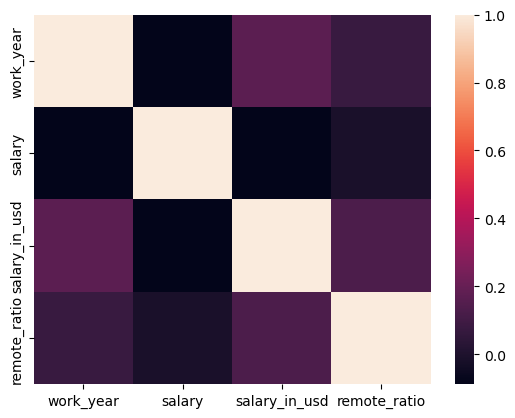

In [13]:
sns.heatmap(ds.corr().T)

In [15]:
fig=px.imshow(ds.corr(),text_auto=True,height=600,width=600,template='ggplot2',aspect='auto',title='<b>paiwise correlation of columns</b>')
fig.update_layout(title_x=0.5)
import plotly.io as pio
pio.renderers.default = 'iframe'
fig.show()

In [18]:
z=ds['job_title'].value_counts().head(10)
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'job title','y':'count','text':'count'},template='seaborn',title='<b> Top 10 Popular Roles in Data Sceince')
fig.show()

In [19]:
fig=px.bar(ds.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in usd'},template='ggplot2',text='salary_in_usd',title='<b> Top 10 Highest Paid Roles in Data Science')
fig.show()

In [20]:
z=ds.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
z['salary_in_usd']=round(z['salary_in_usd'],2)
fig=px.bar(z.head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'avg salary in usd'},text='salary_in_usd',template='seaborn',title='<b> Top 10 Roles in Data Science based on Average Pay')
fig.update_traces(textfont_size=8)
fig.show()

In [21]:
fig=px.pie(ds.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='experience_level',values='salary_in_usd',color='experience_level',hole=0.7,labels={'experience_level':'Experience level ','salary_in_usd':'count'},template='ggplot2',title='<b>Total Jobs Based on Experience Level')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))



In [22]:
fig=px.pie(ds.groupby('employment_type',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='employment_type',values='salary_in_usd',color='employment_type',hole=0.7,labels={'employment_type':'Employment level','salary_in_usd':'count'},template='seaborn',title='<b> Total Jobs Based on Employee Level')
fig.update_layout(title_x=0.5)

In [23]:
fig=px.pie(ds.groupby('company_size',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='company_size',values='salary_in_usd',color='company_size',hole=0.7,labels={'company_size':'Company Size','salary_in_usd':'count'},template='ggplot2',title='<b> Company Sizes in Data Science Feild')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

In [24]:
px.histogram(ds,x='salary_in_usd',marginal='rug',template='seaborn',labels={'salary_in_usd':'Salary in USD'},title='<b> Salary Distribution')

<Axes: xlabel='salary_in_usd', ylabel='Count'>

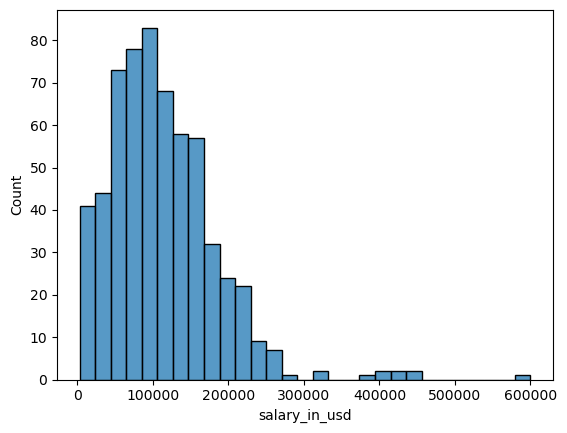

In [30]:
sns.histplot(ds, x='salary_in_usd')

In [31]:


px.box(ds,x='experience_level',y='salary_in_usd',color='experience_level',template='ggplot2',labels={'experience_level':'Experience Level','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by Experience')



In [32]:
px.box(ds,x='employment_type',y='salary_in_usd',color='employment_type',template='seaborn',labels={'employment_type':'Employment Type','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by type of employee')

In [33]:


px.box(ds,x='company_size',y='salary_in_usd',color='company_size',template='ggplot2',labels={'company_size':'Company Size','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by Company Size')





From the Above Analysis, The Country which has Maximum Jobs in the Data Science Feild is US and Contract type Employees has Maximum Salaries in Data Science feild. Employees which has Experience as Senior and Executive Level has maximum salaries. The Top 5 Popular Roles in Data Science are

    Data Scientist
    Data Engineer
    Data Analyst
    ML Engineer
    Reaserch Analyst
